<a href="https://colab.research.google.com/github/iamnileshmehta/Deep-Learning-Projects/blob/main/Deep_learning_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print('The shape of train data: ',train_images.shape)
print('The shape of test data: ', test_images.shape)

The shape of train data:  (60000, 28, 28)
The shape of test data:  (10000, 28, 28)


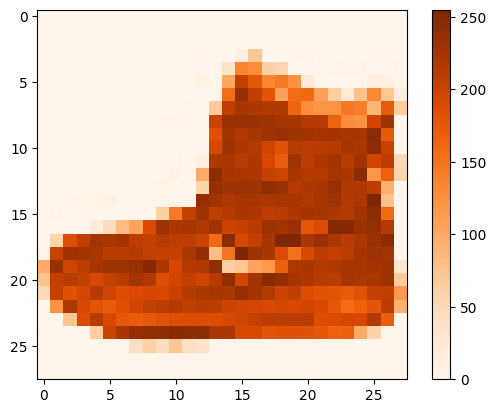

In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap='Oranges')
plt.colorbar()
plt.show()

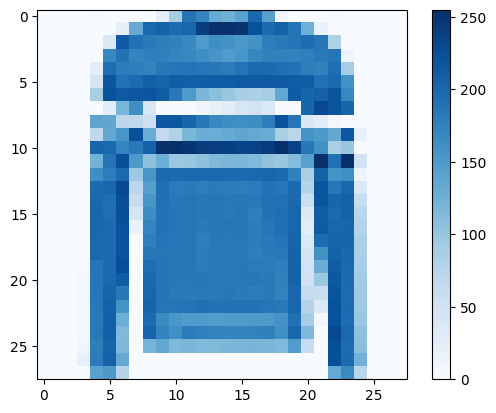

In [ ]:
plt.figure()
plt.imshow(train_images[5], cmap= 'Blues')
plt.colorbar()
plt.show()

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

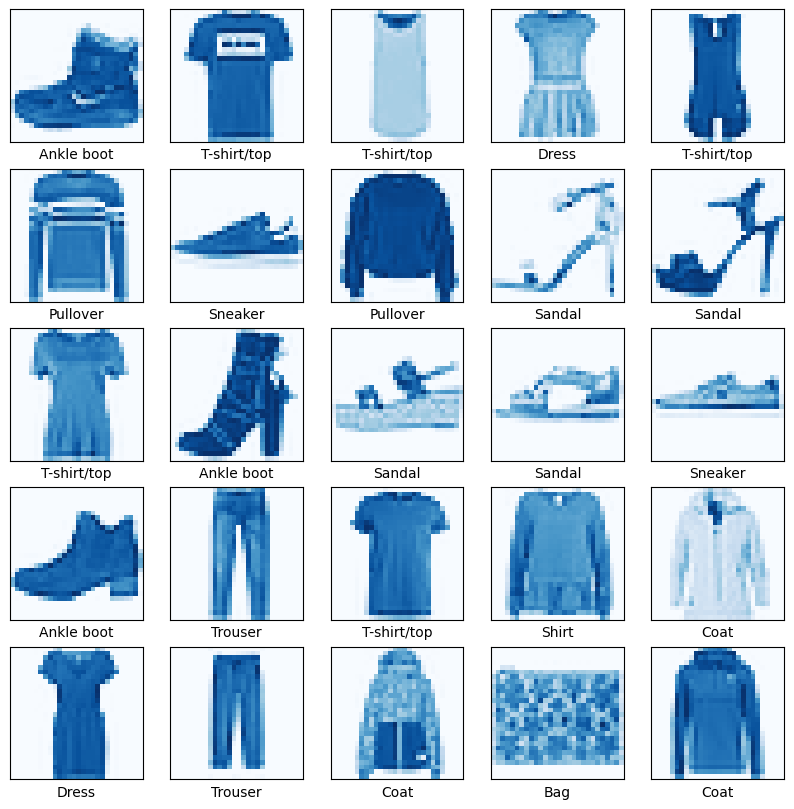

In [ ]:
plt.figure(figsize =(10,10))
for i in range (25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid = False
  plt.imshow(train_images[i], cmap = 'Blues')
  plt.xlabel(class_names[train_labels[i]])
plt.show()


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.fit(train_images, train_labels, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4952 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3716 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3346 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3102 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2945 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2795 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2686 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2572 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2481 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

- Evaluate the model based on accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy: ', test_acc)

313/313 - 1s - loss: 0.3313 - accuracy: 0.8868 - 650ms/epoch - 2ms/step
Test accuracy:  0.8867999911308289


Plot the predictions of the model against the original test image.

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
np.argmax(predictions[0])

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid=False
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel('{}{:2.0f}% ({})'.format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                      color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid=False
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color= '#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


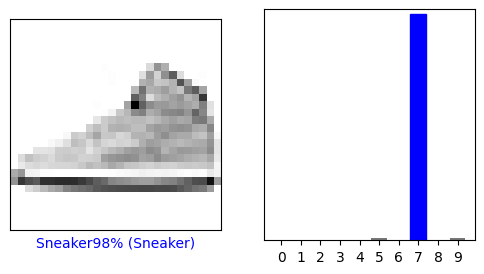

In [ ]:
i =45
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


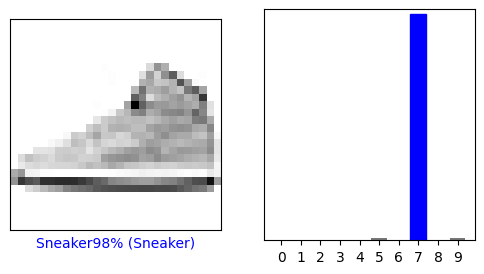

In [ ]:
i = 45
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


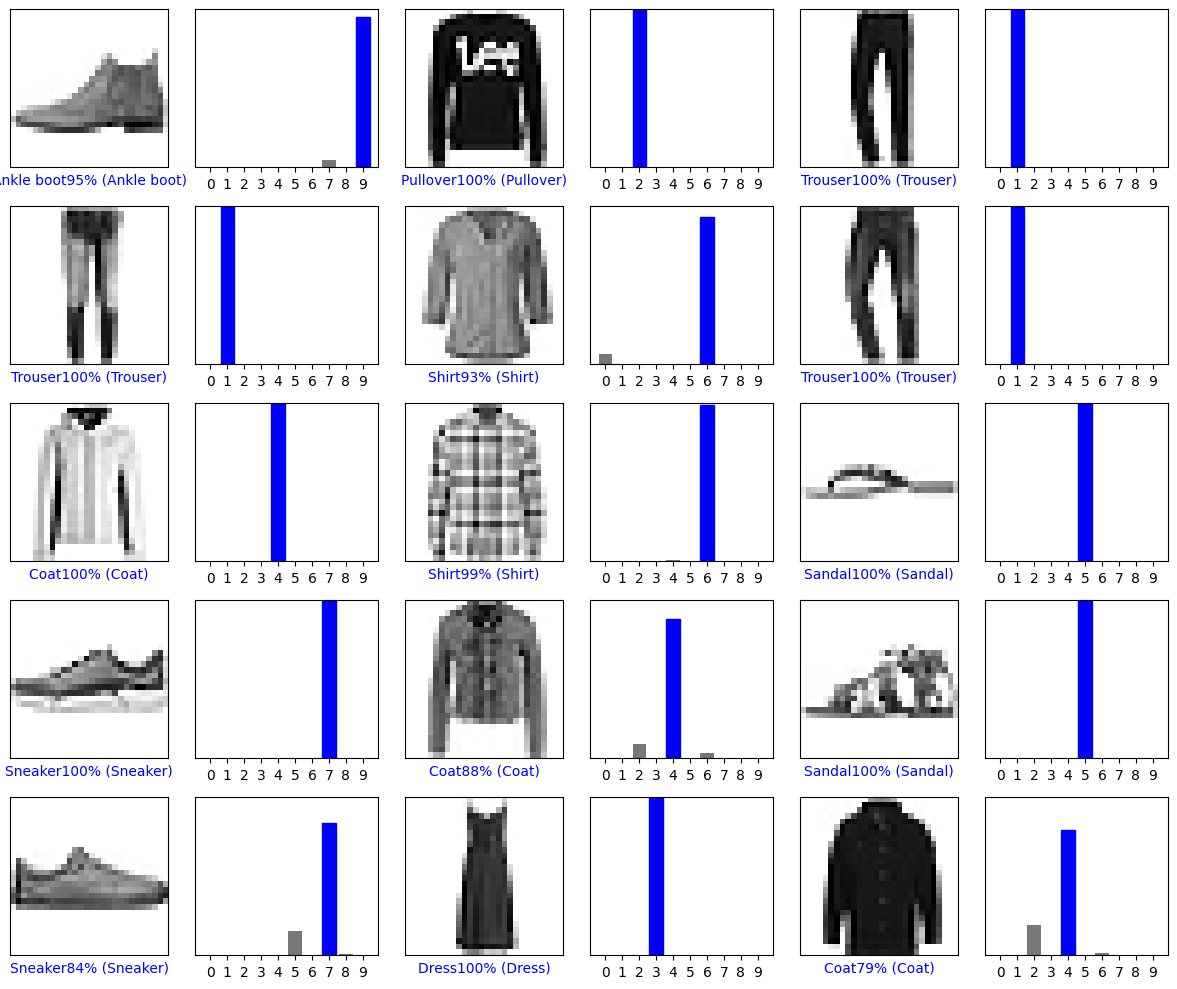

In [ ]:
num_rows = 5
num_cols = 3

num_images = num_rows*num_cols
plt.figure(figsize= (2*2*num_cols, 2*num_rows))
for i in range (num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
